In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("white")

## Warm up: Anscombe

In [80]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

- explore the data
- calculate a few descriptive statistics

In [81]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

- plot it as a multi-panel figure

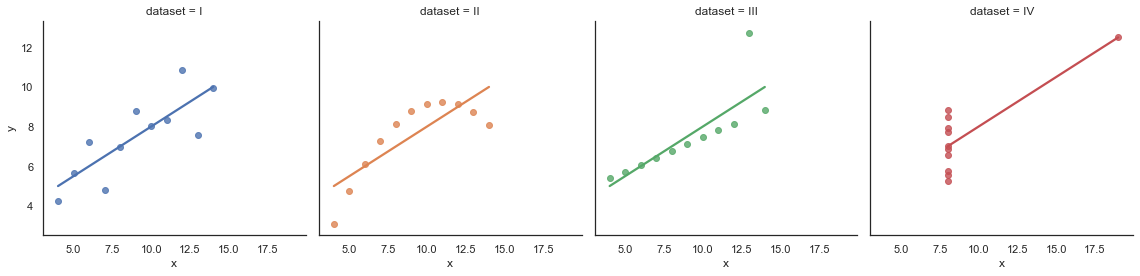

In [82]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, ci=None, height=4)

# Linear regression

### Example with scikit learn: the penguins are back!

In [84]:
#df = pd.read_csv('../week_01/all_penguins_clean.csv', index_col=0)
df = pd.read_csv('all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)
df.shape

(334, 14)

### Let's try to predict Culmen Depth from Culmen Length

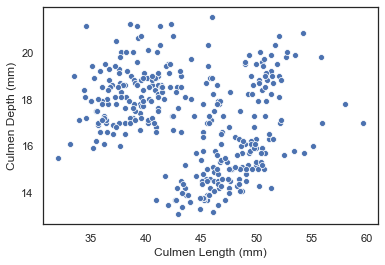

In [85]:
# for all species
sns.scatterplot(df['Culmen Length (mm)'], df['Culmen Depth (mm)'])

In [86]:
X = df[['Culmen Length (mm)']]
y = df['Culmen Depth (mm)']

In [87]:
X.shape, y.shape

((334, 1), (334,))

## Linear Regression with Scikit Learn

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Split data in test and train

In [89]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### Fit linear regression model

In [90]:
lm = LinearRegression().fit(Xtrain, ytrain)

In [91]:
lm.score(Xtest,ytest)

0.0009386495940583162

In [92]:
y_pred = lm.predict(Xtest)

### Let's see how this looks like

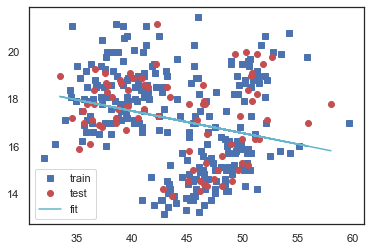

In [93]:
plt.plot(Xtrain, ytrain, 'bs', label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xtest, y_pred, 'c', label="fit")
plt.legend()

### Model evaluation: mean squared error etc..

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, y_pred))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(ytest, y_pred))

Mean squared error: 2.88
Mean absolute error: 1.39
Coefficient of determination: 0.00


## --> separate by species

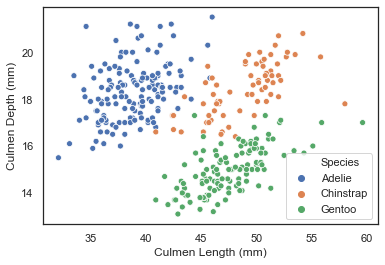

In [96]:
# sperate species
sns.scatterplot(df['Culmen Length (mm)'], df['Culmen Depth (mm)'], hue = df['Species'])

### Chinstrap

Mean squared error for Chinstrap: 0.77
Mean absolute error for Chinstrap: 0.70
Coefficient of determination for Chinstrap: 0.28


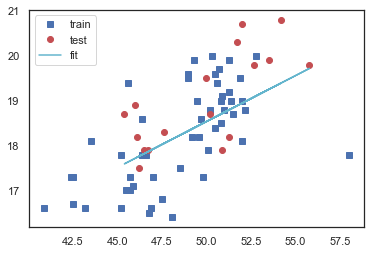

In [99]:
X = df[['Culmen Length (mm)']].loc[df['Species'] == 'Chinstrap']
y = df['Culmen Depth (mm)'].loc[df['Species'] == 'Chinstrap']

X.shape, y.shape
### Split data in test and train

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### Fit linear regression model

lm = LinearRegression().fit(Xtrain, ytrain)

lm.score(Xtest,ytest)

y_pred = lm.predict(Xtest)

### Let's see how this looks like

plt.plot(Xtrain, ytrain, 'bs', label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xtest, y_pred, 'c', label="fit")
plt.legend()

### Model evaluation: mean squared error etc..

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# The mean squared error 
print('Mean squared error for Chinstrap: %.2f'
      % mean_squared_error(ytest, y_pred))
# The mean absolute error 
print('Mean absolute error for Chinstrap: %.2f'
      % mean_absolute_error(ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination for Chinstrap: %.2f'
      % r2_score(ytest, y_pred))

### Adelie

Mean squared error for Chinstrap: 1.66
Mean absolute error for Chinstrap: 0.96
Coefficient of determination for Chinstrap: -0.17


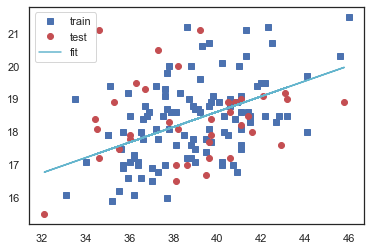

In [100]:
X = df[['Culmen Length (mm)']].loc[df['Species'] == 'Adelie']
y = df['Culmen Depth (mm)'].loc[df['Species'] == 'Adelie']

X.shape, y.shape
### Split data in test and train

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### Fit linear regression model

lm = LinearRegression().fit(Xtrain, ytrain)

lm.score(Xtest,ytest)

y_pred = lm.predict(Xtest)

### Let's see how this looks like

plt.plot(Xtrain, ytrain, 'bs', label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xtest, y_pred, 'c', label="fit")
plt.legend()

### Model evaluation: mean squared error etc..

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# The mean squared error 
print('Mean squared error for Chinstrap: %.2f'
      % mean_squared_error(ytest, y_pred))
# The mean absolute error 
print('Mean absolute error for Chinstrap: %.2f'
      % mean_absolute_error(ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination for Chinstrap: %.2f'
      % r2_score(ytest, y_pred))

### Gentoo

Mean squared error for Chinstrap: 0.63
Mean absolute error for Chinstrap: 0.64
Coefficient of determination for Chinstrap: 0.22


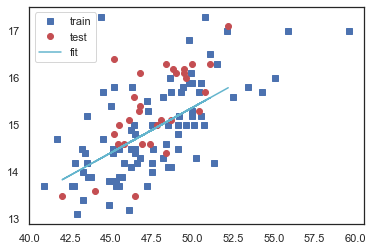

In [102]:
X = df[['Culmen Length (mm)']].loc[df['Species'] == 'Gentoo']
y = df['Culmen Depth (mm)'].loc[df['Species'] == 'Gentoo']

X.shape, y.shape
### Split data in test and train

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### Fit linear regression model

lm = LinearRegression().fit(Xtrain, ytrain)

lm.score(Xtest,ytest)

y_pred = lm.predict(Xtest)

### Let's see how this looks like

plt.plot(Xtrain, ytrain, 'bs', label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xtest, y_pred, 'c', label="fit")
plt.legend()

### Model evaluation: mean squared error etc..

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# The mean squared error 
print('Mean squared error for Chinstrap: %.2f'
      % mean_squared_error(ytest, y_pred))
# The mean absolute error 
print('Mean absolute error for Chinstrap: %.2f'
      % mean_absolute_error(ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination for Chinstrap: %.2f'
      % r2_score(ytest, y_pred))